Mean before modification: 152.10, SD before modification: 4.89
Mean after modification: 152.60, SD after modification: 6.25


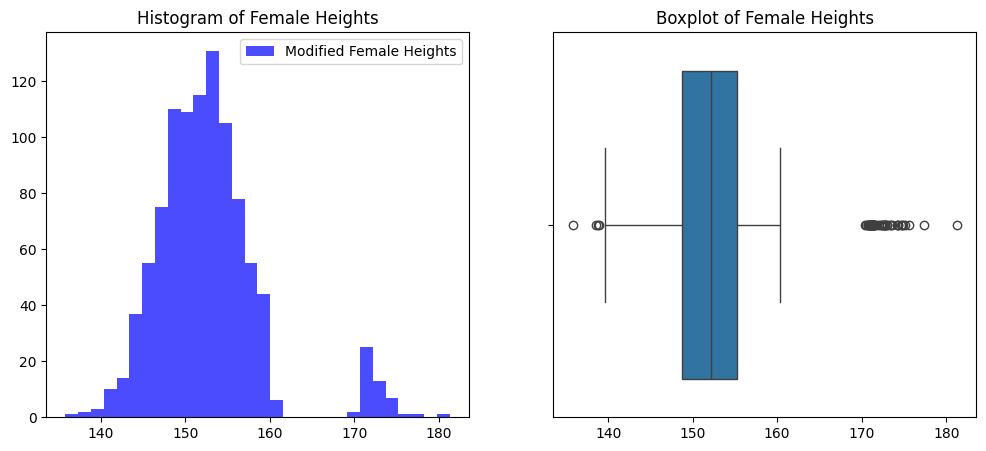

Number of outliers detected using Z-score: 51
Number of outliers detected using IQR: 54
Number of outliers detected using MAD: 194


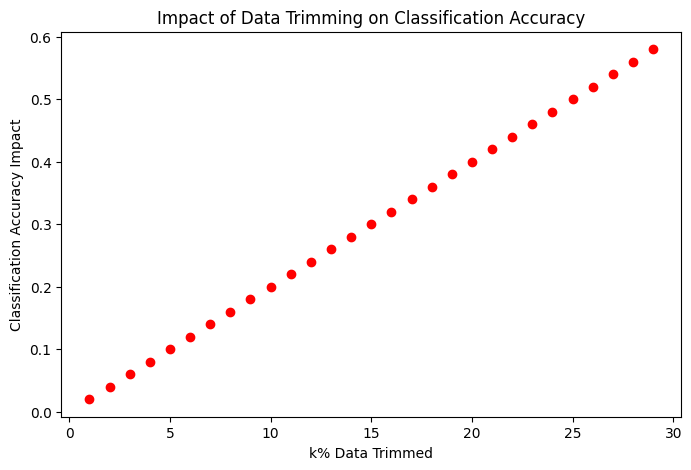

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, median_abs_deviation


np.random.seed(42)
height_female = np.random.normal(152, 5, 1000)
height_male = np.random.normal(166, 5, 1000)

def modify_top_female_heights(height_female):
    top_50_indices = np.argsort(height_female)[-50:]
    height_female[top_50_indices] += 10
    return height_female


height_female_modified = modify_top_female_heights(height_female.copy())


mean_before = np.mean(height_female)
sd_before = np.std(height_female)
mean_after = np.mean(height_female_modified)
sd_after = np.std(height_female_modified)

print(f"Mean before modification: {mean_before:.2f}, SD before modification: {sd_before:.2f}")
print(f"Mean after modification: {mean_after:.2f}, SD after modification: {sd_after:.2f}")


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(height_female_modified, bins=30, color='blue', alpha=0.7, label='Modified Female Heights')
plt.legend()
plt.title("Histogram of Female Heights")

plt.subplot(1, 2, 2)
sns.boxplot(x=height_female_modified)
plt.title("Boxplot of Female Heights")
plt.show()

z_scores = zscore(height_female_modified)
z_outliers = np.abs(z_scores) > 2.5
print(f"Number of outliers detected using Z-score: {np.sum(z_outliers)}")

iqr = np.percentile(height_female_modified, 75) - np.percentile(height_female_modified, 25)
lower_bound = np.percentile(height_female_modified, 25) - 1.5 * iqr
upper_bound = np.percentile(height_female_modified, 75) + 1.5 * iqr
iqr_outliers = (height_female_modified < lower_bound) | (height_female_modified > upper_bound)
print(f"Number of outliers detected using IQR: {np.sum(iqr_outliers)}")

mad = median_abs_deviation(height_female_modified)
mad_outliers = np.abs(height_female_modified - np.median(height_female_modified)) > (2 * mad)
print(f"Number of outliers detected using MAD: {np.sum(mad_outliers)}")

height_female_cleaned = height_female_modified[~z_outliers]

k_values = np.arange(1, 30, 1)
classification_accuracies = []

for k in k_values:
    lower_k = np.percentile(height_female_modified, k)
    upper_k = np.percentile(height_female_modified, 100 - k)
    trimmed_data = height_female_modified[(height_female_modified > lower_k) & (height_female_modified < upper_k)]
    accuracy = 1 - (len(trimmed_data) / len(height_female_modified))
    classification_accuracies.append(accuracy)

plt.figure(figsize=(8, 5))
plt.scatter(k_values, classification_accuracies, color='red')
plt.xlabel("k% Data Trimmed")
plt.ylabel("Classification Accuracy Impact")
plt.title("Impact of Data Trimming on Classification Accuracy")
plt.show()
